First, we'll start with Simple Linear Regression. In Simple Linear Regression, there is only one *independent variable* and, of course, one *dependent variable.* Both of them are continuous, real numbers. Let's represent the independent variable as ``x`` and the dependent variable as ``y``. 

The whole point of data mining and statistical learning is to find patterns in data. In supervised learning, the pattern we're looking for is some sort of *relationship* between the independent variables and the dependent variables. In Simple Linear Regression, we assume this relationship can be represented as the following equation:

$$y = \beta_0 + \beta_1x$$

$\beta_0$ and $\beta_1$ are called the *coefficients*. Specifically, $\beta_0$ is the *intercept* and $\beta_1$ is the slope. If the relationship between ``x`` and ``y`` is truly linear, then if we plot ``x`` against ``y`` we'll see a line. In the abstract 2-d plane, there exist, of course, an infinite number of lines but all of them can be described in terms of their slope and intercept. Linear Regression finds estimates for the coefficients; in other words, it attempts to find *the* one line that best fits the data. 

The first thing we'll do is import some of the tools we need to conduct our Linear Regression.

# Importing Only Parts of a Library

Last week, we learned how to import libraries into our Python environment. You can simply use the `import` keyword to import a library. Once you've imported a library, you can access one of the methods it contains using dot notation. 

```python
import numpy

x = 0.7
numpy.round(x)
>>> 1.0
```

We also learned about the ``as`` keyword, which you can use to simply give an imported library an easier-to-type nickname.

```python
import numpy as np

x = 0.7
np.round(x)
>>> 1.0
```

Note, however, that many libraries, including numpy and scikit-learn are enormous. If you import them, you're introduce a massive amount of new methods and objects into your environment. Often, we only need *a few parts* from a library. In such cases, there's really no need to import the whole thing. Python has a way to accommodate this situation, and it involves the keyword ``from``. This is how you use ``from``:

```python
from numpy import round

x = 0.7
round(x) # Don't have to use dot notation if you use the keyword from
>>> 1.0
```

After ``from``, type out the name of the library or sublibrary your target method is in. Then, follow with ``import`` and then type the name of the method you want. Note that when you use this method **you don't have to use dot notation.** The method gets imported into the environment with its name only. 

# Importing what we need for Linear Regression

Libraries are organized hierarchically. They can have "sub-libraries" under them. ``sklearn`` itself has a sublibrary called ``linear_model`` that contains all of scikit learn's linear models. With this import statement, I'm saying: go to the library ``sklearn``, then go the sublibrary that it possesses called ``linear_model``, and from **that** import the method ``LinearRegression``.

Whether or not you use ``from`` is a matter of personal style. You should, however, be able to recognize how things are being imported in other people's code. 

I'm pretty confident I know what I'll need from scikit-learn: just the Linear Regression model, nothing else. So I'm going to use the ``from`` x ``import`` y formulation.

In [1]:
from sklearn.linear_model import LinearRegression # This is the Linear Regression tool in scikit-learn

Numpy, however, is really versatile and I don't know beforehand what tools I'll need from it. I'll go ahead import the whole thing using the alias ``np``.

In [2]:
import numpy as np

Now, I'm going to import some things to help us with visualization. We'll be learning how to use these tools in a later lecture.

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.ioff()

# Creating a Synthetic Dataset

I'm going to create a *synthetic dataset* to demonstrate Linear Regression. A synthetic dataset is an artifical set of features that we artificially create. 

Why use a synthetic dataset? Since we're making the data, we know the exact relationship between the independent and dependent variables. Because of this, it becomes possible to know how good the estimate of the model is, because we can compare it to the true relationship. This is good for pedagogical purpose. Keep in mind, however, that when we're working with real world data, we won't know what the true relationship between the independent and dependent variables is. 

Let's make our synthetic dataset. Let's imagine we're aliens on a different planet. All of a sudden, all of the weighing scales stop working for a mysterious reason. Tape measures are fine, though. Health officials urgently need some way to estimate someone's weight based on their height. We'll use data from before the weight scale catastrophe to train our model. We've decided to use Linear Regression. This is a sensible choice. Intuition tells us that if someone is taller, they're likely to be heavier, so a linear relationship makes sense. 

## Random Seed

We'll be generating random numbers. But there's a way to generate the *same* random numbers each time, by designating the seed that numpy builds the random numbers from. Non-random random numbers - somewhat of a contradiction in terms. But since this is a pedagogical lecture and I want all students to see the same numbers and same results, I'm setting a seed. When your developing your code, you can also set a seed so during development you're getting consistent results. When  you're done developing, however, you'll want to run your code without a seed to see if your model holds under truly random conditions.

The seed method takes any number as its argument. I'm just picking one. The random numbers generated from the same seed will be the same, no matter who runs it and on what computer its run. 

In [4]:
np.random.seed(3057) 

## Heights
First, let's generate the heights - the independent variable, the variable we can measure and observe. 

Numpy's ``normal`` method takes 3 arguments: the mean, the standard deviation, and the amount of samples. Let's say our aliens have a mean weight of 113 centimeters and the standard deviation - the spread around the mean - is 20. We'll generate 1000 samples.

In [5]:
heights = np.random.normal(113, 20, 1000)

### Data Type: Numpy Array

The return value of the numpy function ``normal`` is a new datatype: a numpy array.

In [6]:
type(heights)

numpy.ndarray

A numpy array is simply a special datatype representing a sequence of numbers. It's not super different from a list; one major difference is that behind-the-scenes numpy is storing the numbers in a way that makes it easier to perform mathematical calculations. Another advantage of numpy arrays is that you can perform *element-wise operations* with them. 

For example, say you have two arrays $a$ and $b$ and you want a third array that contains the sum of each element from $a$ and $b$. With numpy arrays, you can just add them together and get that result. This is much harder to do with standard python lists.

In [7]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a + b

array([5, 7, 9])

Let's take a peek into the heights that were generated.

In [8]:
heights[:25]

array([ 148.26301872,   91.34628367,   98.86534678,  121.27570413,
        132.90888021,  110.90806279,   97.15524614,  101.22194439,
        117.06305949,   89.42646663,  109.1472841 ,  117.23600416,
        110.75196824,   92.74526348,   81.04960924,   90.22069866,
         83.11044862,  114.01626913,  148.77695432,  109.8186788 ,
         85.80658636,  109.60275771,  111.82411747,  103.86530328,
        122.79091825])

As you can see, the heights are clustered around 113, but there's a spread. Some aliens are taller, some are shorter. 

# Weights

Now, let's generate the weights. Here's where the synethic part comes in: we're going to generate the heights directly from the weights, using a linear equation: $\text{weight} = 25.39 + .34 \cdot \text{height} + \epsilon$. I've just made these numbers up. $25.39$ will be the intercept, $\beta_0$, and $.34$ will be the slope, $\beta_1$. 

The $\epsilon$ represents the natural variation that occurs when a relationship isn't *exactly* linear. After all, there may be short aliens that are heavier and tall aliens that are lighter. Such aliens deviate from the linear trend, but the trend still holds. These deviations are also known as *noise*

In [9]:
noise = np.random.normal(0, 5, 1000) # Introduce some noise into the dependent variable. Noise is a numpy array of length 1000. 
weights = 25.39 + .34 * heights + noise # Heights are generated from weights via a linear function. Noise is added.
weights[:25] # Peeking into heights

array([ 81.17100334,  48.97108237,  62.2181163 ,  66.26756442,
        75.61767378,  58.8070338 ,  64.23941426,  62.1639173 ,
        65.0945943 ,  59.43164309,  70.72328823,  65.87809307,
        63.63342536,  62.03837866,  45.56990758,  48.74590021,
        58.55908425,  58.97574389,  81.06447808,  59.06207191,
        60.00121301,  62.73816287,  67.45546926,  60.07201005,  60.42053209])

The first alien is 148.26 cm tall and weighs 81.17 kg. The second alien is 91.35 cm tall and weighs 48.97 kg. We can visualize all the heights and weights by plotting them.

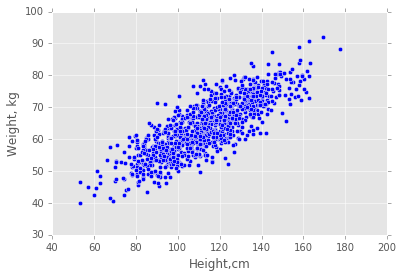

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel("Height,cm")
ax.set_ylabel("Weight, kg")
ax.scatter(heights, weights)
fig

There's a linear relationship here, but because of the noise the points are not *exactly* in a line. Now let's pretend we don't know about that function we use to generate heights from weights. We just have a list of heights and a list of weights - no equation or model to relate the two. Now, we'll use linear regression to find a good *fit* for the data.

# Initializing an Empty Linear Regresson Model

First, we have to make an *instance* of the model. The scikit-learn method ``LinearRegression`` is not a model, instead, it's a factory for making models. You can imagine a scenario where you might be experimenting with multiple models at the same time. What happens here is we *call the method ``LinearRegression``*, and its return value is a single, empty Linear Regression model. It's "empty" because it hasn't been trained yet. We'll save that model in a variable we can refer to.

In [11]:
lr = LinearRegression()
type(lr) # lr is an empty linear regression model

sklearn.linear_model.base.LinearRegression

# Training the Model

Now, we have to train the model. The model has a method called ``fit`` that takes, as its arguments, the independent and dependent variables. Remember, for us, the IV is height and the DV is weight. Calling the ``fit`` method with the data as arguments prompts scikit-learn to train the model.

One problem we have to deal with here is that Linear Regression models, by their function definition, must take an array of arrays as their arguments. Right now, heights and weights are arrays of numbers.

In [12]:
print(heights[:5])
print(weights[:5])

[ 148.26301872   91.34628367   98.86534678  121.27570413  132.90888021]
[ 81.17100334  48.97108237  62.2181163   66.26756442  75.61767378]


Here, I'm going to use a numpy method called ``reshape``, which when passed ``(-1, 1)`` as arguments will turn an array of numbers into an array of arrays.

In [13]:
heights = heights.reshape(-1, 1)
weights = weights.reshape(-1, 1)
print(heights[:5])
print(weights[:5])

[[ 148.26301872]
 [  91.34628367]
 [  98.86534678]
 [ 121.27570413]
 [ 132.90888021]]
[[ 81.17100334]
 [ 48.97108237]
 [ 62.2181163 ]
 [ 66.26756442]
 [ 75.61767378]]


The data is the same, but now each datapoint is inside its own array of length 1. Now we are ready to call the ``fit`` function on the model. This trains the model. The first argument is the independent variable, the second one is the dependent variable we're trying to predict. 

In [14]:
lr.fit(heights, weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

That's it! The model is now trained. Scikit-learn did all the math behind the scenes and found the best-fit linear model. Now we're interested in seeing the results. Remember, all lines are described in terms of their slope and intercept - the coefficients of the equation. They now exist, in the ``lr`` regression model, we just have to pull them out.

# Getting the Coefficients

Once you have called the ``fit`` function, the results are stored in the model: in our case, they are stored in the variable ``lr``, which represents the model we made. The intercept is stored in the model in an attribute called ``intercept_``. Like with methods, we use dot notation to access attributes.

In [15]:
print(lr.intercept_)

[ 25.1977965]


The coefficients are stored in an attribute in the Linear Regression model called ``coef_``.

In [16]:
print(lr.coef_)

[[ 0.34268353]]


How well did this Linear Regression model do? Remember, we generated the heights artificially from the formula $\text{weight} = 25.39 + 0.34 \cdot \text{height} + \epsilon$. In other words, the coefficient $\beta_0 = 25.39$ and the coefficient $\beta_1 = 0.34$. Our Linear Regression model, *not knowing what the generating function was*, estimated $\hat{\beta_0} = 25.20$ and $\hat{\beta_1} = 0.3427$. Not bad at all!

We can visualize the model itself by drawing the line on the plot of the data. Remember, the model is simply estimates of the coefficients, which in turn are simply the slope and intercept of a specific line. Therefore, this line can be drawn. 

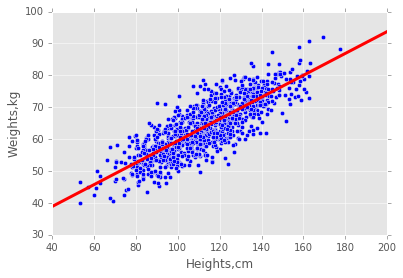

In [17]:
fig.clf()
ax = fig.add_subplot(111)
ax.set_xlabel("Heights,cm")
ax.set_ylabel("Weights,kg")
ax.scatter(heights, weights)
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [lr.predict(xmin)[0][0], lr.predict(xmax)[0][0]], linewidth=3, color="red")
ax.set_xlim([xmin, xmax])
fig

The red line is a visualization of the model found by Linear Regression: the line that best fits the data. This is simulated data, but like real-world data, in this situation very few points lie *exactly* on the models line. However, scikit-learn has found the best fit. 

# Predicting New, Unseen Data with Our Model

Returning to our alien, scale-crisis scenario: now we have a model. We have found a pattern in the data - in the list of heights and weights. That pattern is a linear relationship between heights and weights. Know a height, and you have a reasonable prediction of a weight. 

Someone new comes in, and the doctor needs to know their weight. But all the scales are broken. With our model, however, we can come up with a decent estimate of the weight. 

Once you have trained your model using the ``fit`` method, you'll be able to use a new method on the classifier called ``predict``. If you provide this method with the independent variable, it will output the model's estimate of the dependent variable.

Let's say an alien comes in and it is 102 cm tall. Using our model, we estimate its weight. 

In [18]:
estimated_weight = lr.predict(102)
print(estimated_weight)

[[ 60.15151699]]


The ``predict`` method can handle a list of heights. If 5 aliens come in and we need to estimate their weights:

In [19]:
estimated_weights = lr.predict([[102], [151], [92], [43]])
estimated_weights

array([[ 60.15151699],
       [ 76.94301017],
       [ 56.72468165],
       [ 39.93318847]])

Now you know how to create an empty Linear Regression model, train it, describe the learned model in terms of its coefficients, and make predictions on new, unseen data, using scikit-learn.